In [20]:
# 1. Učitavanje biblioteka
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------
# Učitavanje skupa podataka
# ------------------------------
california = fetch_california_housing(as_frame=True)
df = california.frame

# Prikaz prvih par redova
print("Prvih 5 redova podataka:")
print(df.head())
print("\nOpis kolona:\n", california.feature_names)
print("\nCiljna promenljiva:", california.target_names)


Prvih 5 redova podataka:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Opis kolona:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Ciljna promenljiva: ['MedHouseVal']


📊 Šta su ovi podaci?

Koristiš California Housing Dataset.
On sadrži podatke o različitim oblastima u Kaliforniji i njihovim karakteristikama (atributima):

MedInc → medijana prihoda po domaćinstvu (u desetinama hiljada dolara).

HouseAge → prosečna starost kuća u bloku.

AveRooms → prosečan broj soba po kući u bloku.

AveBedrms → prosečan broj spavaćih soba po kući.

Population → broj ljudi u bloku.

AveOccup → prosečan broj ljudi po domaćinstvu.

Latitude → geografska širina (lokacija na mapi).

Longitude → geografska dužina (lokacija na mapi).

**1a)** Jednostruka linearna regresija.


*   Ideja: koristimo samo jedan atribut (feature) da predviđamo MedHouseVal (cenu kuće).
*   Probaćemo sa više atributa (npr. MedInc, AveRooms, HouseAge).




--- Jednostruka regresija za atribut: MedInc ---
Koeficijent (nagib): 0.41922895462672094
Intercept: 0.4405959892864628
Validacioni skup - MSE: 0.7145000105761757  R2: 0.4526316215409414
Test skup - MSE: 0.7028087817682113  R2: 0.4874220798456208


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


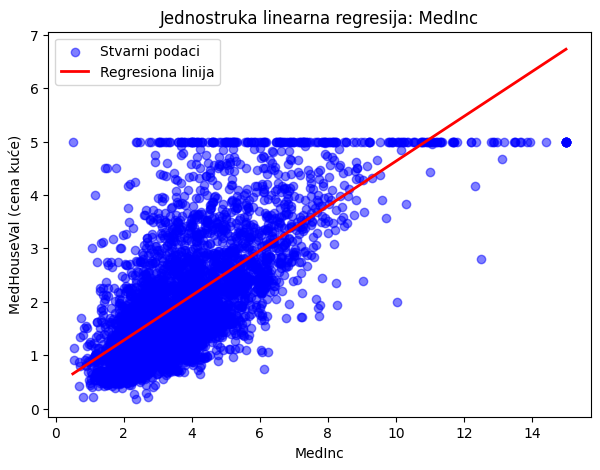


--- Jednostruka regresija za atribut: AveRooms ---
Koeficijent (nagib): 0.07148910521171012
Intercept: 1.6751234564705322
Validacioni skup - MSE: 1.2728571112745088  R2: 0.024882123589375138
Test skup - MSE: 1.3434239618265917  R2: 0.020203676871902942


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


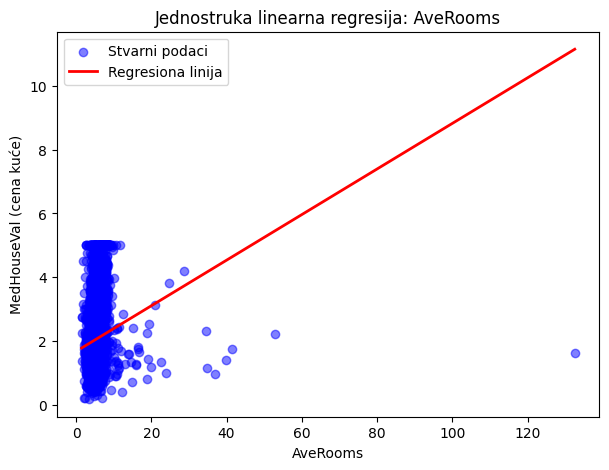


--- Jednostruka regresija za atribut: HouseAge ---
Koeficijent (nagib): 0.009646244205866697
Intercept: 1.7879810008847732
Validacioni skup - MSE: 1.2881391366584924  R2: 0.013174779530337632
Test skup - MSE: 1.3593890537055489  R2: 0.008559892954176918


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


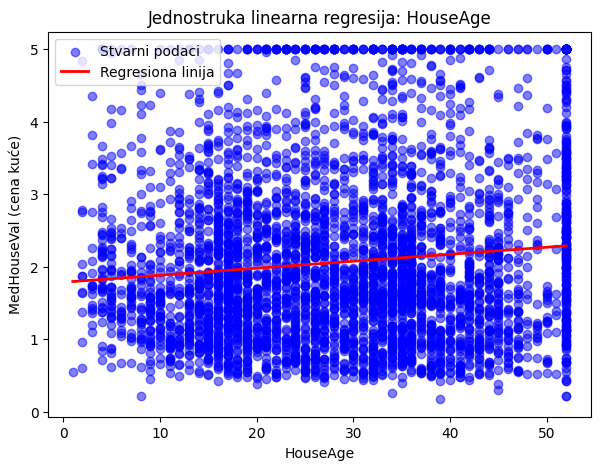

In [22]:
import matplotlib.pyplot as plt

def simple_linear_regression(feature):
    print(f"\n--- Jednostruka regresija za atribut: {feature} ---")

    # X = samo jedna kolona (npr. MedInc)
    X = df[[feature]]
    y = df['MedHouseVal']

    # Podela na trening (60%), validacioni (20%) i test (20%) skup
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Kreiranje i treniranje modela
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Validacija
    y_valid_pred = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)

    # Testiranje
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("Koeficijent (nagib):", model.coef_[0])
    print("Intercept:", model.intercept_)
    print("Validacioni skup - MSE:", mse_valid, " R2:", r2_valid)
    print("Test skup - MSE:", mse_test, " R2:", r2_test)

    # -----------------------
    # Scatter plot + regresiona linija
    # -----------------------
    plt.figure(figsize=(7,5))
    plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Stvarni podaci")

    # Linija regresije
    X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    y_line = model.predict(X_line)
    plt.plot(X_line, y_line, color="red", linewidth=2, label="Regresiona linija")

    plt.xlabel(feature)
    plt.ylabel("MedHouseVal (cena kuće)")
    plt.title(f"Jednostruka linearna regresija: {feature}")
    plt.legend()
    plt.show()

simple_linear_regression("MedInc")
simple_linear_regression("AveRooms")
simple_linear_regression("HouseAge")



Objašnjenje:

*   Koristimo samo jednu promenljivu → dobijamo pravu liniju koja “najbolje” predviđa vrednosti.

*   R2 pokazuje koliko dobro model objašnjava podatke (bliže 1 = bolje).

*   MSE (Mean Squared Error) pokazuje prosečnu kvadratnu grešku (manje = bolje).





**1b)** Višestruka linearna regresija
*   Sada koristimo sve atribute odjednom da predviđamo cenu kuće.






--- Višestruka linearna regresija ---
Koeficijenti za atribute:
MedInc: 0.44924460350126044
HouseAge: 0.009504819540917534
AveRooms: -0.12810292031600767
AveBedrms: 0.8203345777220433
Population: -1.294616838568713e-06
AveOccup: -0.003214126567685476
Latitude: -0.4184258520586006
Longitude: -0.433787875434378

Intercept: -37.09579393590682
Validacioni skup - MSE: 0.5325643962848101  R2: 0.5920099290350325
Test skup - MSE: 0.5546246533101031  R2: 0.5954968710766686


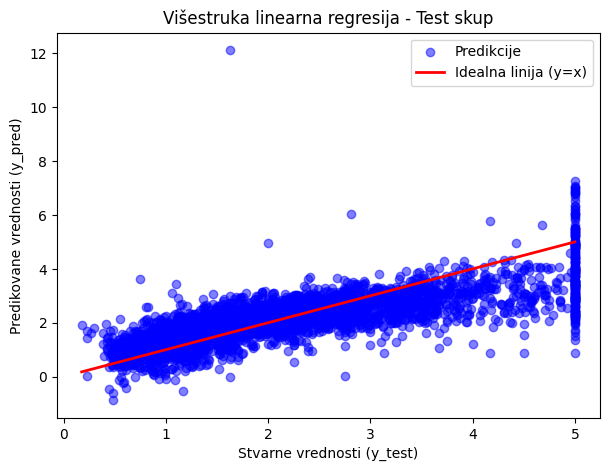

In [23]:
import matplotlib.pyplot as plt

print("\n--- Višestruka linearna regresija ---")

# X = svi atributi
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Podela na trening (60%), validacioni (20%) i test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Kreiranje i treniranje modela
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Validacija
y_valid_pred = model_multi.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

# Testiranje
y_test_pred = model_multi.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Koeficijenti za atribute:")
for feature, coef in zip(X.columns, model_multi.coef_):
    print(f"{feature}: {coef}")

print("\nIntercept:", model_multi.intercept_)
print("Validacioni skup - MSE:", mse_valid, " R2:", r2_valid)
print("Test skup - MSE:", mse_test, " R2:", r2_test)

# --------------------------
# Vizualizacija rezultata
# --------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue", label="Predikcije")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Idealna linija (y=x)")
plt.xlabel("Stvarne vrednosti (y_test)")
plt.ylabel("Predikovane vrednosti (y_pred)")
plt.title("Višestruka linearna regresija - Test skup")
plt.legend()
plt.show()



Šta radi kod?

Ulazni podaci (X i y):

X = svi atributi osim ciljne promenljive (MedHouseVal).
To su recimo: MedInc (median income), HouseAge, AveRooms, Latitude, itd.

y = MedHouseVal (srednja vrednost kuća u datom okrugu).
👉 Dakle, model uči da predviđa vrednost kuće na osnovu ostalih karakteristika.

Podela podataka:

Trening skup = 60%

Validacioni = 20% (koristi se za proveru modela dok ga razvijaš)

Test = 20% (konačna provera generalizacije modela).

Trening modela:

Koristi se LinearRegression() (višestruka linearna regresija).

Uči težine (koeficijente) za svaki atribut, plus intercept.

Rezultati (print):

Koeficijenti govore koliko se ciljna vrednost menja ako se jedan atribut poveća za 1 (dok su ostali fiksni).
Npr:

MedInc: 0.449 → što je veći prihod u oblasti, to su i cene kuća veće.

Longitude: -0.433 i Latitude: -0.418 → što više ideš na jugozapad Kalifornije, cene padaju.

Population: -1.29e-06 → skoro zanemarljiv efekat.

Intercept = -37.09 (to je konstanta, ali sama po sebi nema intuitivno značenje, jer zavisi od centriranja/raspona podataka).

Metrike:

MSE (mean squared error) meri prosečnu kvadratnu grešku.

R² (koeficijent determinacije) ≈ 0.59 → model objašnjava oko 59% varijanse u podacima (nije savršen, ali za ovako sirove podatke je okej).

Vizualizacija:

Na scatter plotu imaš:

X osa = stvarne vrednosti (y_test).

Y osa = predikcije modela (y_test_pred).

Crvena linija je idealna (y = x).

Plavi krugovi su predikcije.

Ako bi model bio savršen, svi plavi poeni ležali bi na crvenoj liniji.

Pošto se dosta njih rasipa oko nje, vidiš da model hvata trend, ali sa značajnim greškama.

📊 Šta prediktuje?

Model prediktuje srednju vrednost kuće (MedHouseVal) u Kaliforniji na osnovu atributa kao što su:

prihod domaćinstava,

prosečan broj soba,

starost kuća,

geografske koordinate (latitude, longitude),

itd.

Drugim rečima, daje ti procenu cene nekretnine (u hiljadama dolara, ako koristiš originalne podatke iz California Housing dataset-a).

⚡ Ukratko:

Model uči linearnu vezu između atributa i cene kuće.

Dobio si relativno solidan R² ≈ 0.59 (znači da 59% varijanse objašnjava).

Scatter plot ti vizuelno pokazuje koliko se predikcije (plavi poeni) poklapaju sa idealnim slučajem (crvena linija).

🧮 Objašnjenje koeficijenata

* Koeficijent = koliko se ciljna vrednost (cena kuće) promeni kada se atribut poveća za jedan korak, dok svi ostali atributi ostaju fiksni.

* MedInc: 0.449 → ako se medijana prihoda poveća za 1 (tj. 10.000 dolara), cena kuće poraste za ~0.449 (tj. 44.900 dolara).

* HouseAge: 0.0095 → starost kuća ima mali pozitivan uticaj.

* AveRooms: -0.128 → više prosečnih soba (bez obzira na veličinu kuće) povezano je sa nižim cenama (može delovati kontraintuitivno, ali često su to stanovi sa mnogo malih soba).

* AveBedrms: 0.820 → više prosečnih spavaćih soba povećava cenu.

* Latitude: -0.418 i Longitude: -0.433 → geografska lokacija je veoma bitna (negativan koeficijent pokazuje da kuće severnije ili istočnije u Kaliforniji imaju nižu cenu u proseku).

* Intercept = -37.09
To je vrednost y kada su svi atributi jednaki 0.
👉 Nema realnog značenja u ovom kontekstu (jer ne možeš imati MedInc=0, Latitude=0 itd.), ali je matematički deo formule.

Objašnjenje:

* Ovaj model koristi više dimenzija i bolje hvata odnose među podacima.

* R2 će ovde biti veći nego kod jednostruke regresije.

* Koeficijenti nam pokazuju uticaj svakog atributa na cenu.

**Grafovi**
Reziduali vs. Stvarne vrednosti → vidiš da li model sistematski greši za male ili velike vrednosti.

Histogram reziduala → da proveriš raspodelu grešaka (idealno je da budu raspoređene oko nule).

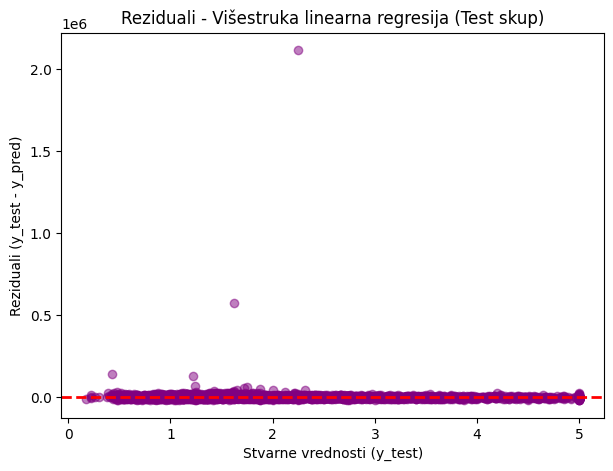

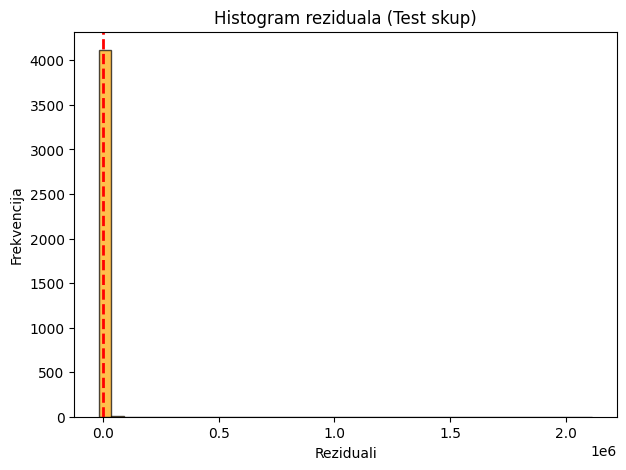

In [26]:
# --------------------------
# Graf reziduala
# --------------------------
residuals = y_test - y_test_pred

# Scatter plot reziduala
plt.figure(figsize=(7,5))
plt.scatter(y_test, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Stvarne vrednosti (y_test)")
plt.ylabel("Reziduali (y_test - y_pred)")
plt.title("Reziduali - Višestruka linearna regresija (Test skup)")
plt.show()

# Histogram reziduala
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=40, color="orange", edgecolor="black", alpha=0.7)
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Reziduali")
plt.ylabel("Frekvencija")
plt.title("Histogram reziduala (Test skup)")
plt.show()


**2a)** Jednostruka linearna regresija gradijentnim metodom


--- Jednostruka regresija (SGD) za atribut: MedInc ---
Koeficijent: 0.7975777902794204
Intercept: 2.0428366710339216
Validacioni skup - MSE: 0.7153701842867657  R2: 0.45196499373703236
Test skup - MSE: 0.7038830626262209  R2: 0.4866385770463604


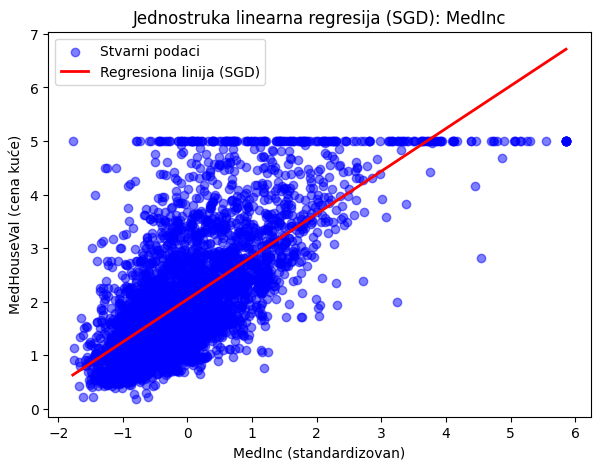


--- Jednostruka regresija (SGD) za atribut: AveRooms ---
Koeficijent: 0.17679189327686173
Intercept: 2.041529570563581
Validacioni skup - MSE: 1.2730706089279198  R2: 0.024718566048965607
Test skup - MSE: 1.3453066895771373  R2: 0.018830551350956015


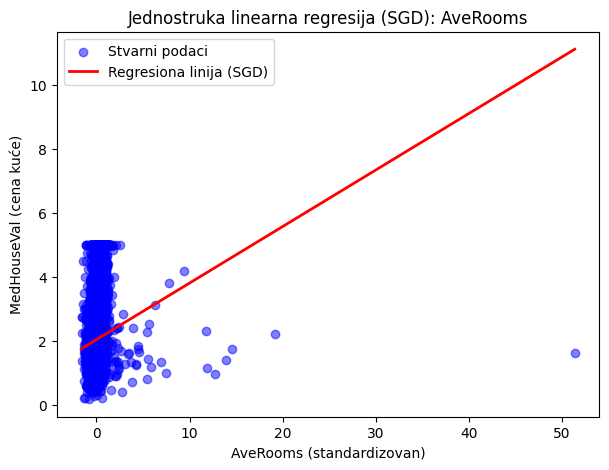


--- Jednostruka regresija (SGD) za atribut: HouseAge ---
Koeficijent: 0.147674107504787
Intercept: 2.0455634335662523
Validacioni skup - MSE: 1.2881304278798043  R2: 0.013181451202833538
Test skup - MSE: 1.3621403813436808  R2: 0.006553273465346843


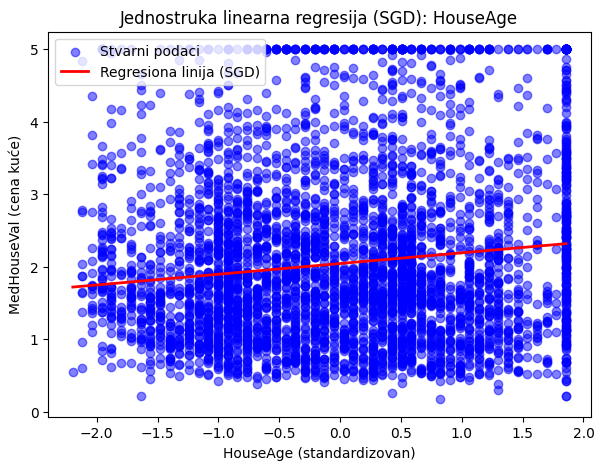

In [24]:
import matplotlib.pyplot as plt

def simple_regression_sgd(feature):
    print(f"\n--- Jednostruka regresija (SGD) za atribut: {feature} ---")

    # X = samo jedna kolona
    X = df[[feature]]
    y = df["MedHouseVal"]

    # Standardizacija je bitna za gradijentne metode!
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Podela na train/valid/test
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Kreiramo model sa gradijentnim spustom
    model = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
    model.fit(X_train, y_train)

    # Validacija
    y_valid_pred = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)

    # Test
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("Koeficijent:", model.coef_[0])
    print("Intercept:", model.intercept_[0])
    print("Validacioni skup - MSE:", mse_valid, " R2:", r2_valid)
    print("Test skup - MSE:", mse_test, " R2:", r2_test)

    # -----------------------
    # Scatter plot + regresiona linija
    # -----------------------
    plt.figure(figsize=(7,5))
    plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Stvarni podaci")

    # Regresiona linija
    X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    y_line = model.predict(X_line)
    plt.plot(X_line, y_line, color="red", linewidth=2, label="Regresiona linija (SGD)")

    plt.xlabel(feature + " (standardizovan)")
    plt.ylabel("MedHouseVal (cena kuće)")
    plt.title(f"Jednostruka linearna regresija (SGD): {feature}")
    plt.legend()
    plt.show()

simple_regression_sgd("MedInc")
simple_regression_sgd("AveRooms")
simple_regression_sgd("HouseAge")


Ovde smo koristili samo jedan atribut (npr. MedInc, HouseAge, AveRooms) da predvidimo cenu kuće. Model se uči tako što postepeno podešava koeficijent prave i intercept pomerajući ih u pravcu manjeg MSE. Rezultati su slični kao kod analitičke metode, ali se dobijaju iterativno. Koeficijent pokazuje koliko izabrani atribut utiče na cenu kuće, a intercept je konstanta u formuli.

**2b)** Višestruka linearna regresija gradijentnim metodom


--- Višestruka regresija (SGD) ---
Koeficijenti za atribute:
MedInc: 1674.0009484193558
HouseAge: 44.081695314436566
AveRooms: -3967.6784322974418
AveBedrms: 2231.237726075612
Population: 210.84244263446647
AveOccup: -96829.53645948587
Latitude: 5787.19515010596
Longitude: 6716.214315510109

Intercept: -1357.5174405985608
Validacioni skup - MSE: 199364678.16839027  R2: -152730466.45379934
Test skup - MSE: 1226252699.6584313  R2: -894340073.6832291


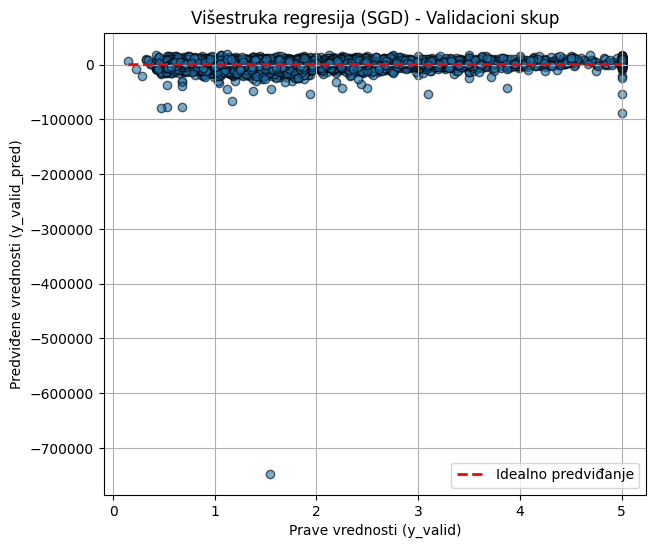

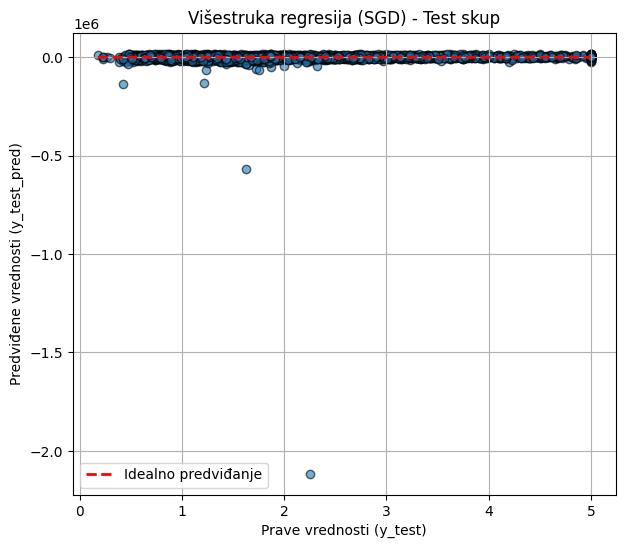

In [25]:
# -------------------------
# b) Višestruka regresija
# -------------------------
print("\n--- Višestruka regresija (SGD) ---")

# X = svi atributi
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Standardizacija (jako bitno za SGD!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podela na train/valid/test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Kreiramo i treniramo model
model_multi_sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
model_multi_sgd.fit(X_train, y_train)

# Validacija
y_valid_pred = model_multi_sgd.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

# Test
y_test_pred = model_multi_sgd.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Koeficijenti za atribute:")
for feature, coef in zip(X.columns, model_multi_sgd.coef_):
    print(f"{feature}: {coef}")

print("\nIntercept:", model_multi_sgd.intercept_[0])
print("Validacioni skup - MSE:", mse_valid, " R2:", r2_valid)
print("Test skup - MSE:", mse_test, " R2:", r2_test)

import matplotlib.pyplot as plt

# Scatter plot za validacioni skup
plt.figure(figsize=(7, 6))
plt.scatter(y_valid, y_valid_pred, alpha=0.6, edgecolor="k")
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         "r--", lw=2, label="Idealno predviđanje")
plt.xlabel("Prave vrednosti (y_valid)")
plt.ylabel("Predviđene vrednosti (y_valid_pred)")
plt.title("Višestruka regresija (SGD) - Validacioni skup")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot za test skup
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2, label="Idealno predviđanje")
plt.xlabel("Prave vrednosti (y_test)")
plt.ylabel("Predviđene vrednosti (y_test_pred)")
plt.title("Višestruka regresija (SGD) - Test skup")
plt.legend()
plt.grid(True)
plt.show()



Ovde koristimo sve atribute odjednom. Model uči pomoću gradijentnog spusta – na početku pravi velike greške, a zatim kroz epohe smanjuje grešku i približava se rešenju. Na kraju dobijamo slične koeficijente kao kod analitičke metode. Prednost ovog pristupa je što radi i na veoma velikim skupovima podataka gde analitička metoda ne bi bila praktična.

**2c)** Graf konvergencije

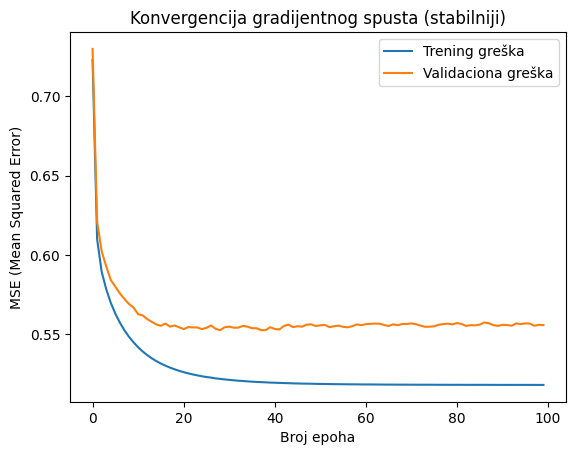

In [10]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Podaci
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Skaliranje
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model sa manjim learning rate i stabilnijim učenjem
sgd = SGDRegressor(max_iter=1, tol=None, penalty=None,
                   eta0=0.001, learning_rate="invscaling",
                   shuffle=True, random_state=42)

n_epochs = 100
train_errors = []
valid_errors = []

for epoch in range(n_epochs):
    # Shuffle podataka da model uči "nasumično"
    X_train, y_train = shuffle(X_train, y_train, random_state=epoch)

    sgd.partial_fit(X_train, y_train)

    # Predikcije
    y_train_pred = sgd.predict(X_train)
    y_valid_pred = sgd.predict(X_valid)

    # Greške
    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)

    train_errors.append(train_mse)
    valid_errors.append(valid_mse)

# Graf
plt.plot(range(n_epochs), train_errors, label="Trening greška")
plt.plot(range(n_epochs), valid_errors, label="Validaciona greška")
plt.xlabel("Broj epoha")
plt.ylabel("MSE (Mean Squared Error)")
plt.title("Konvergencija gradijentnog spusta (stabilniji)")
plt.legend()
plt.show()


Pokazuje kako greška opada tokom epoha – validaciona greška može u jednom trenutku da prestane da opada, što signalizira da je model “naučio dovoljno” i da bi dalji trening mogao da vodi u overfitting.

**4)** Implementirati linearnu regresiju (analitičku i gradijentnu metodu) bez upotrebe biblioteka

In [16]:
import numpy as np
import pandas as pd

# X = svi atributi, y = cilj
X = df.drop(columns=["MedHouseVal"]).values
y = df["MedHouseVal"].values.reshape(-1, 1)

# Skaliranje X (ručno, bez sklearn StandardScaler)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Dodaj kolonu jedinica za intercept (bias)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Podela na train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ------------------------------
# 1) Analitička metoda
# ------------------------------
theta_analytical = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

# Predikcija
y_pred_analytical = X_test @ theta_analytical

# MSE
mse_analytical = np.mean((y_test - y_pred_analytical) ** 2)

print("\nAnalitička metoda:")
print("Parametri (theta):\n", theta_analytical.flatten())
print("MSE na test skupu:", mse_analytical)

# ------------------------------
# 2) Gradijentni spust
# ------------------------------
def gradient_descent(X, y, lr=0.01, n_epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))  # inicijalizacija parametara

    for epoch in range(n_epochs):
        gradients = (2/m) * X.T @ (X @ theta - y)
        theta -= lr * gradients
    return theta

theta_gd = gradient_descent(X_train, y_train, lr=0.01, n_epochs=1000)

# Predikcija
y_pred_gd = X_test @ theta_gd

# MSE
mse_gd = np.mean((y_test - y_pred_gd) ** 2)

print("\nGradijentni spust:")
print("Parametri (theta):\n", theta_gd.flatten())
print("MSE na test skupu:", mse_gd)



Analitička metoda:
Parametri (theta):
 [ 2.06786231  0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841
 -0.03662363 -0.89663505 -0.86892682]
MSE na test skupu: 0.5558915986952444

Gradijentni spust:
Parametri (theta):
 [ 2.06803454  0.84887725  0.1502694  -0.24395566  0.28949346  0.00716587
 -0.03881055 -0.68569387 -0.65517135]
MSE na test skupu: 0.5536027250114283


**Dodatni Zadatak**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# 1. Učitavanje podataka
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 2. Ciljna promenljiva
y = train["SalePrice"]
X = train.drop(columns=["SalePrice"])

# 3. Spajanje train+test (da obradimo kategorije i nedostajuće vrednosti isto)
all_data = pd.concat([X, test], axis=0)

# 4. Identifikacija numeričkih i kategorijskih kolona
num_cols = all_data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = all_data.select_dtypes(include=["object"]).columns

# 5. Pipeline za numeričke i kategorijske kolone
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ])

# 6. Model
model = RandomForestRegressor(
    n_estimators=200, random_state=42, n_jobs=-1
)

# 7. Kreiranje pipeline-a
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# 8. Train/valid split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Trening
pipeline.fit(X_train, y_train)

# 10. Evaluacija
y_pred = pipeline.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validacioni RMSE:", rmse)

# 11. Predikcija na test skupu
test_preds = pipeline.predict(test)

# 12. Pravljenje submission fajla
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)

print("Gotov fajl: submission.csv")


Validacioni RMSE: 28496.787082143084
Gotov fajl: submission.csv


Super pitanje 👌
Idemo deo po deo da ti bude jasno šta se dešava i zašto je urađeno baš ovako:

---

## 🔹 Zašto baš **Random Forest**?

Random Forest je **ansambl metoda** bazirana na velikom broju **decision tree stabala**.

* Svako stablo uči na malo drugačijem podskupu podataka (bootstrap uzorkovanje).
* Stabla se kombinuju tako što se njihove predikcije proseče.

👉 Prednosti:

* Može da hvata **nelinearne odnose** (za razliku od obične linearne regresije).
* Dobro radi sa **velikim brojem kategorija** (npr. različiti tipovi krova, komšijluka).
* Automatski "razume" interakcije između atributa (npr. kuća izgrađena 2000. sa garažom ima drugačiju vrednost od iste kuće bez garaže).
* Robustno na **outliere** i šum.
* Ne zahteva mnogo feature engineering-a (za razliku od linearne regresije).

Zbog toga je Random Forest često prvi izbor za **tabularne podatke** kao u ovom zadatku (House Prices).

---

## 🔹 Šta radi **Pipeline**?

U scikit-learn-u, `Pipeline` je način da se **svi koraci obrade i modela povežu u jednu celinu**.

Umesto da pišeš posebno:

1. popuni nedostajuće vrednosti,
2. skaliraj numeričke kolone,
3. kodiraj kategorijske,
4. treniraj model,

👉 ti spojiš sve u **jednu mašinu** (`pipeline`) i samo pozoveš `.fit(X, y)` i `.predict(X)`.

Prednost:

* Smanjuje greške (nema šanse da "zaboraviš" da obradiš test podatke isto kao train).
* Čuva se cela logika u jednom objektu – možeš ga kasnije sačuvati i koristiti.
* Radi uniformno i na `train.csv` i na `test.csv`.

---

## 🔹 Šta radi **ColumnTransformer**?

Podaci imaju i numeričke i kategorijske kolone. Svaka vrsta zahteva različitu obradu:

* **Numeričke**:

  * Popunjavaju se median vrednostima (`SimpleImputer(strategy="median")`).
  * Skaliraju se (`StandardScaler`) – da model ne "favorizuje" one sa velikim vrednostima (npr. LotArea vs. OverallQual).

* **Kategorijske**:

  * Popunjavaju se najčešćom vrednošću (`SimpleImputer(strategy="most_frequent")`).
  * Kodiraju se preko **OneHotEncoder** → npr. `RoofStyle = ["Gable", "Hip", "Flat"]` se pretvara u 3 binarne kolone (0/1).

`ColumnTransformer` ti omogućava da kažeš:

* “Na ove kolone primeni numerički pipeline”
* “Na ove kolone primeni kategorijski pipeline”

---

## 🔹 Tok rada koda (korak po korak)

1. **Učitavanje podataka** (`train.csv`, `test.csv`).
2. Razdvajanje ciljne promenljive (`SalePrice`) od atributa.
3. Definišeš koje kolone su numeričke, a koje kategorijske.
4. Napraviš pipeline za numeričke i kategorijske kolone.
5. Spojiš ih sa `ColumnTransformer`.
6. Dodaš RandomForest kao finalni model.
7. Sve ubaciš u **jedan Pipeline**.
8. Treniraj model (`.fit`).
9. Evaluiraj ga pomoću RMSE.
10. Predvidi vrednosti za test skup i napravi fajl `submission.csv`.

---

## 🔹 Zašto baš RMSE?

RMSE (root mean squared error) je mera greške koja:

* Kvadrira odstupanja → velika odstupanja više kažnjava.
* Dobro radi kada te zanimaju **velike greške** (npr. predvideti kuću od \$400,000 kao \$100,000 je katastrofa).

Formula:

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

Manji RMSE = bolji model.

---

⚡ Ukratko:

* Random Forest je izabran jer dobro radi na tabličnim podacima i hvata nelinearne odnose.
* Pipeline služi da **automatski obradi podatke i trenira model u jednom potezu**.
* ColumnTransformer deli numeričke i kategorijske kolone da svaka dobije odgovarajući tretman.
* RMSE je mera kojom meriš kvalitet predikcija.

---

Hoćeš da ti dodam i **par alternativa Random Forestu** (npr. XGBoost, GradientBoosting) koje često daju bolje rezultate na ovom Kaggle zadatku?
